* INCLUDE mixed donor sample
* REMOVED 5-prime sample
* Add lower filtering threshhold for 'total_counts' (not only 'n_genes')
* Add AVN samples 

## Import modules

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import scrublet as scr
import session_info

In [2]:
sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')
session_info.show()

## Read in anndata

In [3]:
adata = sc.read_h5ad('/nfs/team205/heart/anndata_objects/8regions/QC/scRNA_adult_prefilter.h5ad')
adata

AnnData object with n_obs × n_vars = 345070 × 33538
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval'
    var: 'gene_name', 'ambient_expression-0', 'ambient_expression-1', 'feature_type-1', 'ambient_expression-10', 'feature_type-10', 'ambient_expression-11', 'feature_type-11', 'ambient_expression-12', 'feature_type-12', 'ambient_expression-13', 'feature_type-13', 'ambient_expression-14', 'feature_type-14', 'ambient_expression-15', 'feature_type-15', 'ambient_expression-16', 'feature_type-16', 'ambient_expression-17', 'feature_type-17', 'ambient_expression-18', 'feature_type-18', 'ambient_expression-19', 'feature_type-19', 'ambient_expression-2', 'feature_type-2', 'ambient_expression-20', 'feature_type-20', 'amb

In [4]:
adata.obs['sangerID'].value_counts()

HCAHeart7844003    15000
HCAHeart8102862    15000
HCAHeart8102861    15000
HCAHeart8102860    15000
HCAHeart8102859    15000
HCAHeart8102857    15000
HCAHeart7728605    15000
HCAHeart7844001    14995
HCAHeart8102868    14993
HCAHeart8102866    14993
HCAHeart8102858    14554
HCAHeart7844004    14277
HCAHeart7745968    12255
HCAHeart7728606    12014
HCAHeart7745969     8804
HCAHeart7656536     8019
HCAHeart8102865     7855
HCAHeart7843999     7738
HCAHeart8102867     7695
HCAHeart7905328     7632
HCAHeart7728607     6500
HCAHeart7905327     5900
HCAHeart7905332     5896
HCAHeart7850549     5412
HCAHeart7745967     5096
HCAHeart7844000     4851
HCAHeart7850551     4838
HCAHeart7850546     4758
HCAHeart7850548     4288
HCAHeart7850547     3910
HCAHeart8102864     3829
HCAHeart7850540     3826
HCAHeart7905331     3674
HCAHeart7844002     3605
HCAHeart7656538     2661
HCAHeart7745966     2332
HCAHeart7751845     2213
HCAHeart7905330     2166
HCAHeart7905329     1791
HCAHeart7850541     1731


## Remove doublets

<AxesSubplot:>

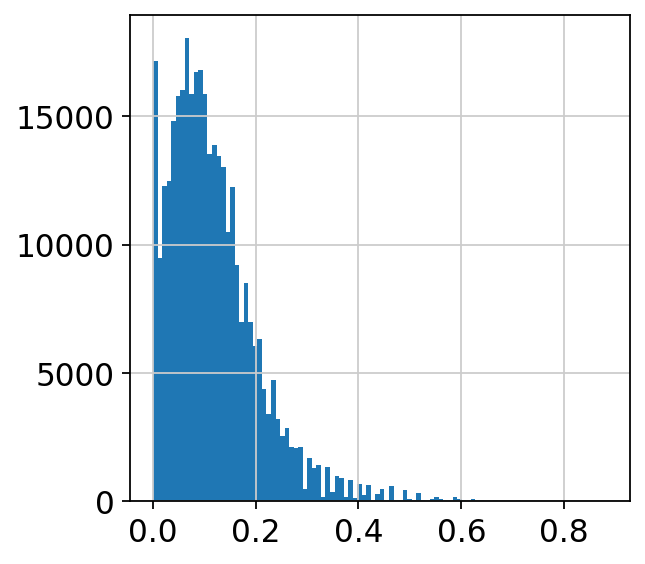

In [5]:
adata.obs['scrublet_score'].hist(bins=100)

In [6]:
# set threshold (arbitrary)
dbl_score_thresh=0.3

prop = np.sum(adata.obs['scrublet_score']>=dbl_score_thresh)/len(adata)
print(f'proportion of doublets: {prop}')

proportion of doublets: 0.04264931752977657


In [7]:
# Remove doublets
adata = adata[adata.obs['scrublet_score']<dbl_score_thresh]
adata

View of AnnData object with n_obs × n_vars = 329739 × 33538
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval'
    var: 'gene_name', 'ambient_expression-0', 'ambient_expression-1', 'feature_type-1', 'ambient_expression-10', 'feature_type-10', 'ambient_expression-11', 'feature_type-11', 'ambient_expression-12', 'feature_type-12', 'ambient_expression-13', 'feature_type-13', 'ambient_expression-14', 'feature_type-14', 'ambient_expression-15', 'feature_type-15', 'ambient_expression-16', 'feature_type-16', 'ambient_expression-17', 'feature_type-17', 'ambient_expression-18', 'feature_type-18', 'ambient_expression-19', 'feature_type-19', 'ambient_expression-2', 'feature_type-2', 'ambient_expression-20', 'feature_type-2

## Remove low quality cells

In [8]:
sc.pp.filter_cells(adata, min_genes=200, inplace=True)
sc.pp.filter_cells(adata, min_counts=500, inplace=True)
adata.shape

filtered out 121806 cells that have less than 200 genes expressed
Trying to set attribute `.obs` of view, copying.
filtered out 20049 cells that have less than 500 counts


(187884, 33538)

## Compute QC stats

In [9]:
adata.var

,gene_name,ambient_expression-0,ambient_expression-1,feature_type-1,ambient_expression-10,feature_type-10,ambient_expression-11,feature_type-11,ambient_expression-12,feature_type-12,...,ambient_expression-52,ambient_expression-53,ambient_expression-6,feature_type-6,ambient_expression-7,feature_type-7,ambient_expression-8,feature_type-8,ambient_expression-9,feature_type-9
ENSG00000243485,MIR1302-2HG,0.000000e+00,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,...,0.000000e+00,0.000000e+00,0.0,Gene Expression,0.000000,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression
ENSG00000237613,FAM138A,0.000000e+00,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,...,0.000000e+00,0.000000e+00,0.0,Gene Expression,0.000000,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression
ENSG00000186092,OR4F5,0.000000e+00,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,...,0.000000e+00,0.000000e+00,0.0,Gene Expression,0.000000,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression
ENSG00000238009,AL627309.1,1.017239e-13,8.512921e-15,Gene Expression,7.227378e-14,Gene Expression,1.330998e-12,Gene Expression,0.000000e+00,Gene Expression,...,0.000000e+00,5.090681e-08,0.0,Gene Expression,0.000005,Gene Expression,1.826447e-13,Gene Expression,8.860014e-07,Gene Expression
ENSG00000239945,AL627309.3,0.000000e+00,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,...,0.000000e+00,0.000000e+00,0.0,Gene Expression,0.000000,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000277856,AC233755.2,0.000000e+00,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,...,0.000000e+00,0.000000e+00,0.0,Gene Expression,0.000000,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression
ENSG00000275063,AC233755.1,0.000000e+00,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,...,0.000000e+00,0.000000e+00,0.0,Gene Expression,0.000000,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression
ENSG00000271254,AC240274.1,4.173505e-07,3.101463e-07,Gene Expression,2.301973e-14,Gene Expression,2.251008e-13,Gene Expression,9.469121e-14,Gene Expression,...,3.109790e-07,3.684404e-07,0.0,Gene Expression,0.000002,Gene Expression,8.447880e-14,Gene Expression,7.492845e-07,Gene Expression
ENSG00000277475,AC213203.1,0.000000e+00,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression,...,0.000000e+00,0.000000e+00,0.0,Gene Expression,0.000000,Gene Expression,0.000000e+00,Gene Expression,0.000000e+00,Gene Expression


In [10]:
adata.var['mt'] = adata.var['gene_name'].str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['ribo'] = adata.var['gene_name'].str.startswith('RPS','RPL')  # annotate the group of ribosomal genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo'], percent_top=None, log1p=False, inplace=True)

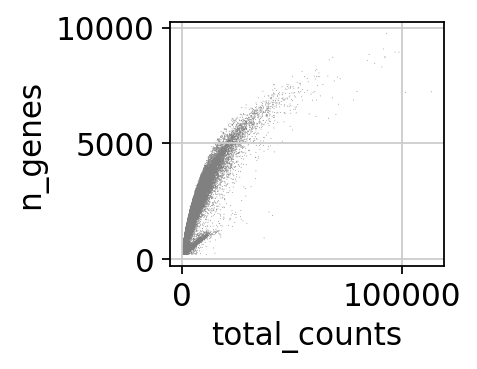

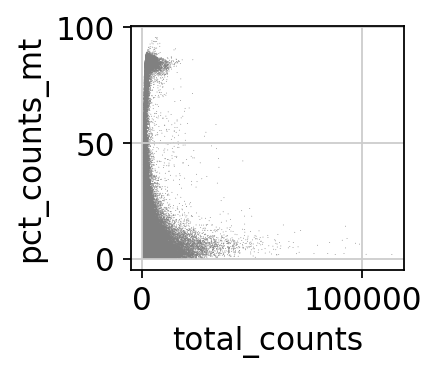

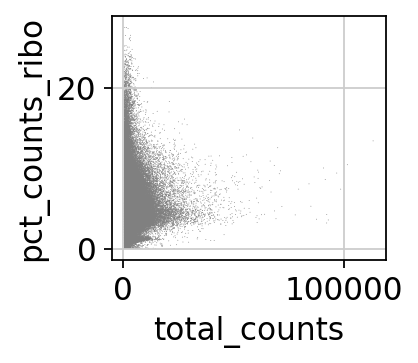

In [11]:
plt.rcParams['figure.figsize'] = [3, 2]

sc.pl.scatter(adata, x='total_counts', y='n_genes')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='pct_counts_ribo')

## Remove cells exceeding the ribo/mito threshold

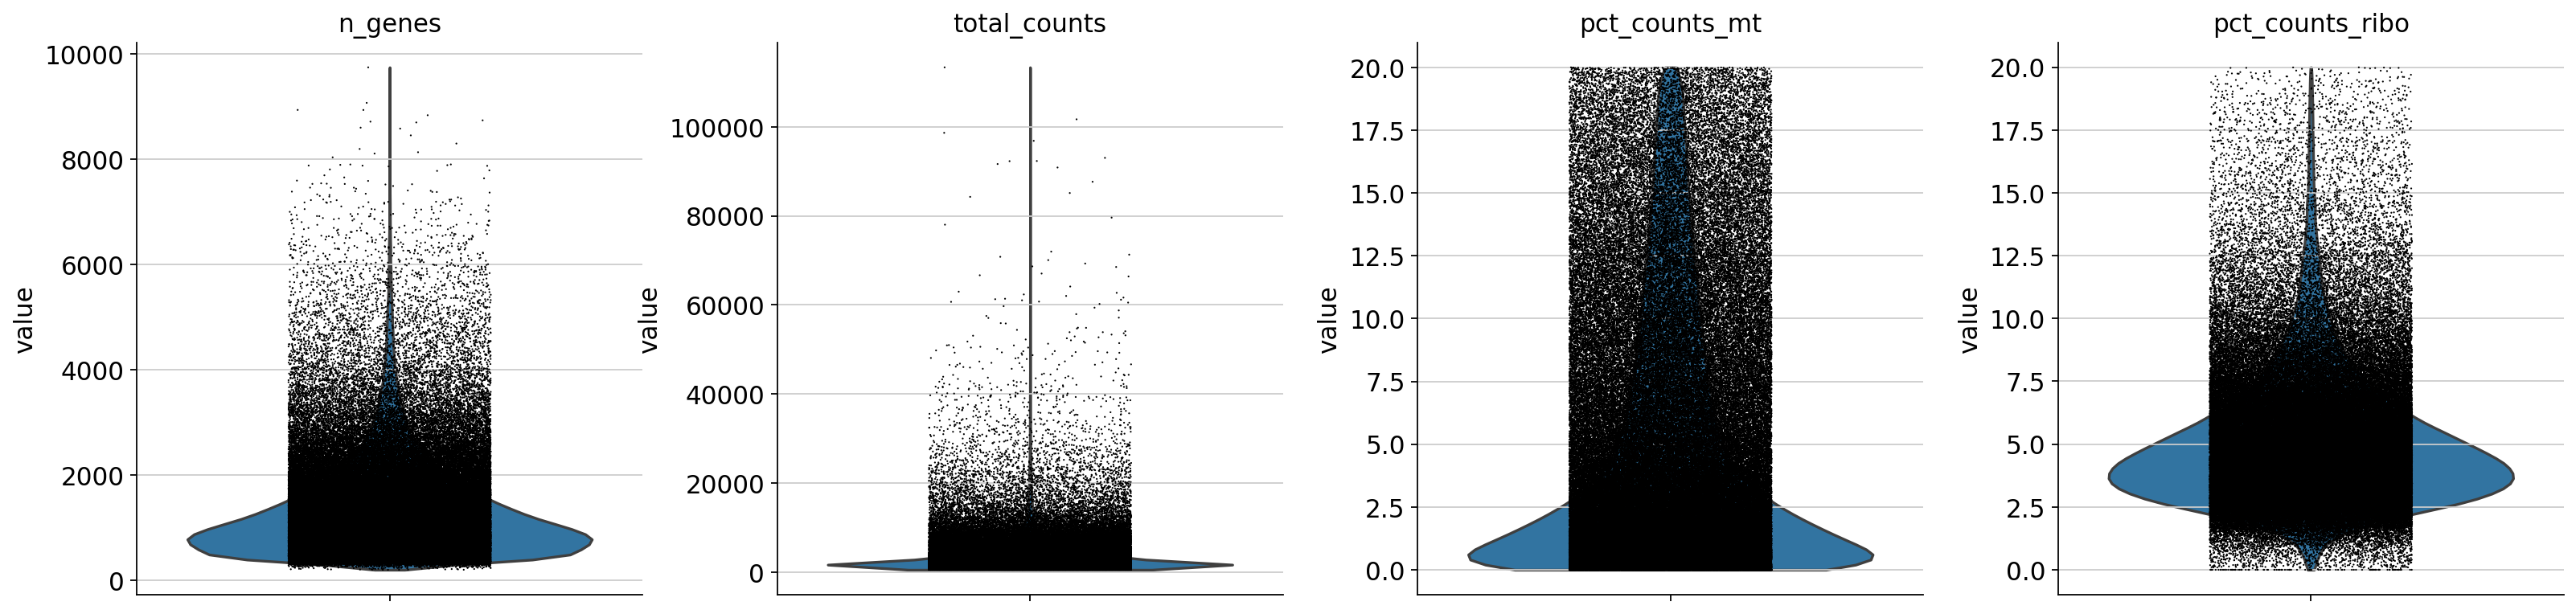

In [12]:
plt.rcParams['figure.figsize'] = [2, 2]
adata = adata[adata.obs['pct_counts_mt'] < 20, :]
adata = adata[adata.obs['pct_counts_ribo'] < 20, :]
sc.pl.violin(adata, ['n_genes', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],jitter = 0.2, multi_panel = True)

In [13]:
adata.shape

(151666, 33538)

In [14]:
adata.obs['sangerID'].value_counts()

HCAHeart7844001    13217
HCAHeart8102861    12037
HCAHeart8102859    11132
HCAHeart7844004    11061
HCAHeart8102862    10807
HCAHeart7843999     6342
HCAHeart7905328     6200
HCAHeart7844003     5737
HCAHeart7905332     5164
HCAHeart7905327     4680
HCAHeart8102868     4248
HCAHeart7850551     4141
HCAHeart7844000     3892
HCAHeart8102866     3614
HCAHeart8102858     3532
HCAHeart7905331     2931
HCAHeart8102865     2852
HCAHeart7850549     2780
HCAHeart7850546     2748
HCAHeart8102860     2741
HCAHeart7745968     2427
HCAHeart7656536     2284
HCAHeart7844002     2184
HCAHeart7850540     1893
HCAHeart7656538     1779
HCAHeart7850548     1767
HCAHeart7905330     1597
HCAHeart7745969     1530
HCAHeart7850547     1426
HCAHeart8102867     1384
HCAHeart7745966     1340
HCAHeart7905329     1268
HCAHeart7850545     1092
HCAHeart7751845     1075
HCAHeart7656534      965
HCAHeart7850543      906
HCAHeart7850541      823
HCAHeart7728606      679
HCAHeart7850544      666
HCAHeart7728608      562


## Save

In [15]:
adata.write('/nfs/team205/heart/anndata_objects/8regions/QC/scRNA_adult.h5ad')
adata

View of AnnData object with n_obs × n_vars = 151666 × 33538
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'donor_type', 'region', 'region_finest', 'age', 'gender', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'flushed', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_name', 'ambient_expression-0', 'ambient_expression-1', 'feature_type-1', 'ambient_expression-10', 'feature_type-10', 'ambient_expression-11', 'feature_type-11', 'ambient_expression-12', 'feature_type-12', 'ambient_expression-13', 'feature_type-13', 'ambient_expression-14', 'feature_type-14', 'ambient_expression-15', 'feature_type-15', 'ambient_expression-16', 'feature_type-16', 'ambient_expression-17', 'feature_type-17', 'ambient_expression-18', 'feature_

In [16]:
adata.obs['donor'].value_counts()

D6     64273
D11    53051
D7     19302
D5      7199
D3      5744
D4      1867
D1       230
Name: donor, dtype: int64